<font face="Poppins" size=2>Install the Afinn, tqdm, and tensorflow libraries. Afinn is used for sentiment analysis, tqdm for progress bars, and tensorflow for machine learning tasks.<font>

In [1]:
!pip install Afinn
!pip install tqdm
!pip install tensorflow
!pip install vaderSentiment
!pip install textblob
!pip install finbert
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Afinn: filename=afinn-0.1-py3-none-any.whl size=53429 sha256=55bd2929c65f0e657b32f9df5cbe0106e0b67a35ac53333b03d7060d5b498673
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built Afinn
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.4 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement finbert (from versions: none)
ERROR: No matching distribution found for finbert


In [2]:
#!/usr/bin/env python
# coding: utf-8

# Import necessary libraries
import ast
import csv as csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import matplotlib.font_manager as font_manager
from pathlib import Path
from IPython.display import HTML
from datetime import datetime, timedelta
import os
import numpy as np
import time
import seaborn as sns
from scipy import stats as stat
import yfinance as yf
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from afinn import Afinn
from nltk.stem import WordNetLemmatizer
import string
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from html import unescape
from keras import callbacks
from keras.callbacks import EarlyStopping
from tqdm import tqdm
import shutil
from multiprocessing import Pool, cpu_count
from concurrent.futures import ProcessPoolExecutor
from concurrent.futures import ThreadPoolExecutor
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
from torch.nn import CrossEntropyLoss
from IPython.display import clear_output
import matplotlib.cm as cm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support, classification_report
from sklearn.utils.class_weight import compute_class_weight
from matplotlib import ticker
from scipy import stats as stats
from textblob import TextBlob
from concurrent.futures import ProcessPoolExecutor, as_completed

# Download NLTK data if not already downloaded
nltk.download('vader_lexicon')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

# Initialize Afinn Sentiment analysis
afn = Afinn()

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

import logging

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [3]:
def copy_file_if_exists(source_path, destination_path):
    """
    Copies a file from source_path to destination_path if the source file exists.

    Args:
    source_path (str): The path to the source file.
    destination_path (str): The path where the file should be copied.

    Returns:
    str: A message indicating the result of the operation.
    """
    if os.path.exists(source_path):
        shutil.copy(source_path, destination_path)
        return "File copied successfully."
    else:
        return f"Error: The source file {source_path} does not exist."

In [4]:
def copy_folder(source_dir, destination_dir):
    """
    Copies an entire folder from source_dir to destination_dir.

    Args:
    source_dir (str): The path to the source directory.
    destination_dir (str): The path where the directory should be copied.

    Returns:
    str: A message indicating the result of the operation.
    """
    try:
        # Check if the source directory exists
        if not os.path.exists(source_dir):
            return f"Error: The source directory {source_dir} does not exist."

        # Check if the destination directory already exists
        if os.path.exists(destination_dir):
            return f"Error: The destination directory {destination_dir} already exists."

        # Perform the folder copy
        shutil.copytree(source_dir, destination_dir)
        return f"Folder successfully copied from {source_dir} to {destination_dir}."
    except Exception as e:
        return f"An error occurred: {e}"

In [5]:
# Data loading from Google Drive
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [6]:
shutil.copytree("/content/drive/MyDrive/MyModelAjibolaProject/Poppins", "/content/Poppins", dirs_exist_ok=True)

'/content/Poppins'

In [7]:
# Font Path CONSTANTS
ROOT = Path('/content/')
POPPINS_FAMILY_PATH = ROOT.joinpath('Poppins')


font_dirs = [POPPINS_FAMILY_PATH]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

plt.rcParams['font.family'] = 'Poppins'
plt.rcParams['font.size'] = 9.5

In [8]:
shutil.copy("/content/drive/MyDrive/MyModelAjibolaProject/Company.csv", "/content/Company.csv")

'/content/Company.csv'

In [9]:
shutil.copy("/content/drive/MyDrive/MyModelAjibolaProject/Company_Tweet.csv", "/content/Company_Tweet.csv")

'/content/Company_Tweet.csv'

In [10]:
shutil.copy("/content/drive/MyDrive/MyModelAjibolaProject/Tweet.csv", "/content/Tweet.csv")

'/content/Tweet.csv'

In [11]:
shutil.copy("/content/drive/MyDrive/MyModelAjibolaProject/tweets_labelled_09042020_16072020.csv", "/content/tweets_labelled_09042020_16072020.csv")

'/content/tweets_labelled_09042020_16072020.csv'

In [12]:
shutil.copy("/content/drive/MyDrive/MyModelAjibolaProject/Finbert.csv", "/content/Finbert.csv")

'/content/Finbert.csv'

In [13]:
# Setting up Constants and Loading Data:
#h = -12  # Time offset
training_proportion = 0.80
lookback_period = 10  # Look-back value
color_main = '#1f77b4'
color_predict = 'orange'

In [14]:
# Load the data from CSV files into Pandas DataFrames for processing
company_df = pd.read_csv('/content/Company.csv')
company_tweet_df = pd.read_csv('/content/Company_Tweet.csv')
tweet_df = pd.read_csv('/content/Tweet.csv')

In [15]:
class TwitterTextProcessor:
    def __init__(self):
        # Initialize a set of English stop words
        self.stop_words = set(stopwords.words('english'))
        # Initialize a lemmatizer to reduce words to their base or root form
        self.lemmatizer = WordNetLemmatizer()
        # Initialize a tokenizer specifically designed for tweets
        self.tweet_tokenizer = TweetTokenizer()
        # Regular expressions for cleaning
        self.non_ascii_regex = re.compile(r'[^\x00-\x7F]+')
        self.hyperlink_regex = re.compile(r'http\S+')
        self.hashtag_symbol = 'HASHTAGSYMBOL'
        self.atsymbol = 'ATSYMBOL'

    def remove_non_ascii_chars(self, text):
        return self.non_ascii_regex.sub(' ', text)

    def remove_hyperlinks(self, text):
        return self.hyperlink_regex.sub('', text)

    # Function to remove hyperlinks and "Read more"
    def remove_links_and_read_more(self, text):
       # Regular expression pattern to match hyperlinks and "Read more" text
        pattern = r'(Read more: |http:\/\/\S+)'
        return re.sub(pattern, '', text)

    def clean_tweet(self, text, vader=False):
        """
        General function to clean text for sentiment analysis, preserving sentiment-related elements
        """

        # Unescape HTML entities, replace certain characters with space or remove them
        cleaned_tweet = unescape(text).replace('\"', '').replace('\'', '').replace('-', ' ')

        # Remove the 'RT @' (retweet) part of the tweet if present
        if cleaned_tweet.startswith("RT @"):
            cleaned_tweet = cleaned_tweet.split(':', 1)[-1].strip()

        # Apply cleaning methods
        cleaned_tweet = self.remove_links_and_read_more(cleaned_tweet)
        cleaned_tweet = self.remove_non_ascii_chars(cleaned_tweet)
        cleaned_tweet = self.remove_hyperlinks(cleaned_tweet)


        if not vader:
            # Temporarily replace hashtags and mentions with placeholder text
            cleaned_tweet = cleaned_tweet.replace('#', self.hashtag_symbol).replace('@', self.atsymbol)

            # Tokenize the tweet, remove punctuation, and apply lemmatization
            tokens = [w for w in self.tweet_tokenizer.tokenize(cleaned_tweet) if w not in string.punctuation]
            tokens = [self.lemmatizer.lemmatize(w) for w in tokens if w.lower() not in self.stop_words and len(w) > 1]
            # Reconstruct the tweet from the processed tokens
            cleaned_tweet = ' '.join(tokens)
            # Replace the placeholders with the original symbols
            cleaned_tweet = cleaned_tweet.replace(self.hashtag_symbol, '#').replace(self.atsymbol, '@')

        return cleaned_tweet

    def clean_tweets_single_threaded(self, tweets, vader=False):
        # Clean a batch of tweets in a single-threaded manner with logging
        cleaned_tweets = []

        for index, tweet in enumerate(tqdm(tweets, desc="Cleaning tweets")):
            try:
                cleaned_tweet = self.clean_tweet(tweet, vader)
                cleaned_tweets.append(cleaned_tweet)
            except Exception as e:
                logging.error(f"Error processing tweet at index {index}: {e}")

        return cleaned_tweets

    def clean_tweets(self, tweets, vader=False):
        # Clean a batch of tweets using parallel processing
        cleaned_tweets = []

        # Skip None or NaN values
        tweets = [tweet for tweet in tweets if tweet is not None and str(tweet).strip()]

        with ProcessPoolExecutor(max_workers=4) as executor:
            futures = [executor.submit(self.clean_tweet, tweet, vader) for tweet in tweets]

            for future in as_completed(futures):
                cleaned_tweets.append(future.result())

        return cleaned_tweets


        return cleaned_tweets

    def cleaned_file_creator(self, op_file_name, original_tweets, cleaned_tweets):
        # Create a CSV file with cleaned tweets
        with open(op_file_name, 'w+', newline='') as csvFile:
            csvWriter = csv.writer(csvFile)
            # Write each pair of values (e.g., original and cleaned tweet) as a row in the CSV
            for tweet in tqdm(zip(original_tweets, cleaned_tweets)):
                csvWriter.writerow(tweet)


<font face="Poppins" size=2>Determine the optimal algorithim to utilize for sentimental analysis. For this project, we will utilize Afinn, Vader and finBert and determine which is best. We will use the labelled dataset from: https://ieee-dataport.org/open-access/stock-market-tweets-data and Finbert: https://huggingface.co/ProsusAI/finbert<font>

<font face="Poppins" size=2>FinBERT is a pre-trained NLP model to analyze sentiment of financial text. It is built by further training the BERT language model in the finance domain, using a large financial corpus and thereby fine-tuning it for financial sentiment classification. Financial PhraseBank by Malo et al. (2014) is used for fine-tuning.<font>

In [16]:
# Function to load and process the CSV files with progress updates
def process_and_merge_csv_files(finbert_file, tweets_labelled_file):
    print("Loading Finbert.csv...")
    finbert_df = pd.read_csv(finbert_file)

    print("Loading tweets_labelled CSV file...")
    tweets_labelled_df = pd.read_csv(tweets_labelled_file, delimiter=';', on_bad_lines='skip')

    print("Renaming columns...")
    finbert_df.rename(columns={'Sentence': 'tweets', 'Sentiment': 'sentiments'}, inplace=True)
    tweets_labelled_df.rename(columns={'text': 'tweets', 'sentiment': 'sentiments'}, inplace=True)

    print("Filtering tweets_labelled DataFrame...")
    filtered_tweets_labelled_df = tweets_labelled_df.dropna(subset=['tweets', 'sentiments'])

    print("Merging DataFrames...")
    final_merged_df = pd.concat([finbert_df, filtered_tweets_labelled_df], ignore_index=True, sort=False)

    # Remove 'id' and 'created_at' columns
    final_merged_df.drop(['id', 'created_at'], axis=1, inplace=True)

    return final_merged_df

# File paths
finbert_file_path = '/content/Finbert.csv'
tweets_labelled_file_path = '/content/tweets_labelled_09042020_16072020.csv'

# Process and merge CSV files with progress updates
final_merged_df = process_and_merge_csv_files(finbert_file_path, tweets_labelled_file_path)

# Display the first few rows of the final merged dataframe
final_merged_df.head()

Loading Finbert.csv...
Loading tweets_labelled CSV file...
Renaming columns...
Filtering tweets_labelled DataFrame...
Merging DataFrames...


,tweets,sentiments
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [17]:
# Count positive, negative, and neutral tweets separately
positive_count = (final_merged_df['sentiments'] == 'positive').sum()
negative_count = (final_merged_df['sentiments'] == 'negative').sum()
neutral_count = (final_merged_df['sentiments'] == 'neutral').sum()

# Display the counts
print("Positive Tweets Count:", positive_count)
print("Negative Tweets Count:", negative_count)
print("Neutral Tweets Count:", neutral_count)

Positive Tweets Count: 2380
Negative Tweets Count: 1208
Neutral Tweets Count: 3554


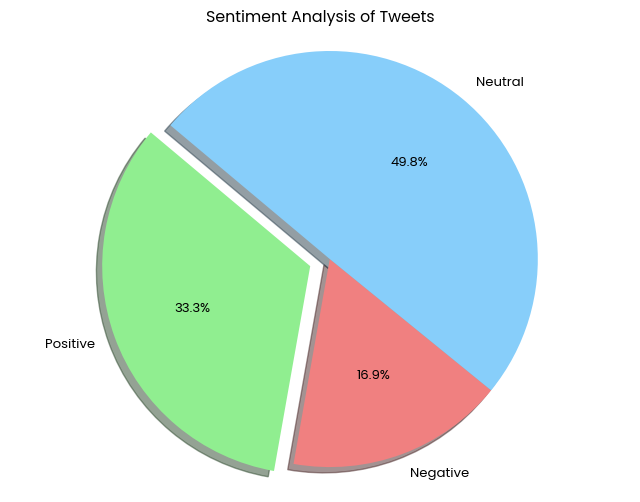

In [18]:
# Data for pie chart
labels = 'Positive', 'Negative', 'Neutral'
sizes = [positive_count, negative_count, neutral_count]
colors = ['lightgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0)  # explode 1st slice (Positive)

# Plot
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sentiment Analysis of Tweets')
plt.show()

<font face="Poppins" size=2>The tweets and news are cleaned already so no need to clean them. So employ afinn,vader and finvbert to identify their sentimental score compatibility<font>

In [19]:
# Calculate AFINN scores for each tweet and add them as a new column 'afinn_score'
final_merged_df['afinn_score'] = final_merged_df['tweets'].apply(lambda x: afn.score(x))

# Define a function to map AFINN scores to sentiment labels
def map_afinn_score_to_sentiment(afinn_score):
    if afinn_score > 0:
        return 'positive'
    elif afinn_score < 0:
        return 'negative'
    else:
        return 'neutral'

# Create a new column 'afinn_sentiments' based on AFINN scores
final_merged_df['afinn_sentiments'] = final_merged_df['afinn_score'].apply(map_afinn_score_to_sentiment)

# Compare the original 'sentiments' with 'afinn_sentiments'
comparison_df = final_merged_df[['sentiments', 'afinn_sentiments']]

# Display the first few rows of the comparison DataFrame
print(comparison_df.head())

# Calculate the percentage of agreement between 'sentiments' and 'afinn_sentiments'
alignment_percentage = (final_merged_df['sentiments'] == final_merged_df['afinn_sentiments']).mean() * 100

# Display the percentage of agreement
print(f"Percentage of Agreement: {alignment_percentage:.2f}%")

  sentiments afinn_sentiments
0   positive         positive
1   negative          neutral
2   positive         negative
3    neutral          neutral
4    neutral          neutral
Percentage of Agreement: 55.82%


In [20]:
# Calculate VADER sentiment scores for each tweet and add them as a new column 'vader_score'
final_merged_df['vader_score'] = final_merged_df['tweets'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Define a function to map VADER scores to sentiment labels
def map_vader_score_to_sentiment(vader_score):
    if vader_score > 0.05:
        return 'positive'
    elif vader_score < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Create a new column 'vader_sentiments' based on VADER scores
final_merged_df['vader_sentiments'] = final_merged_df['vader_score'].apply(map_vader_score_to_sentiment)

# Compare the original 'sentiments' with 'vader_sentiments'
vader_comparison_df = final_merged_df[['sentiments', 'vader_sentiments']]

# Display the first few rows of the VADER comparison DataFrame
print(vader_comparison_df.head())

# Calculate the percentage of agreement between 'sentiments' and 'vader_sentiments'
vader_alignment_percentage = (final_merged_df['sentiments'] == final_merged_df['vader_sentiments']).mean() * 100

# Display the VADER percentage of agreement
print(f"VADER Percentage of Agreement: {vader_alignment_percentage:.2f}%")


  sentiments vader_sentiments
0   positive         positive
1   negative         negative
2   positive         positive
3    neutral          neutral
4    neutral          neutral
VADER Percentage of Agreement: 53.72%


In [21]:
# Calculate TextBlob sentiment scores for each tweet and add them as a new column 'textblob_score'
final_merged_df['textblob_score'] = final_merged_df['tweets'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Define a function to map TextBlob scores to sentiment labels
def map_textblob_score_to_sentiment(textblob_score):
    if textblob_score > 0:
        return 'positive'
    elif textblob_score < 0:
        return 'negative'
    else:
        return 'neutral'

# Create a new column 'textblob_sentiments' based on TextBlob scores
final_merged_df['textblob_sentiments'] = final_merged_df['textblob_score'].apply(map_textblob_score_to_sentiment)

# Compare the original 'sentiments' with 'textblob_sentiments'
textblob_comparison_df = final_merged_df[['sentiments', 'textblob_sentiments']]

# Display the first few rows of the TextBlob comparison DataFrame
print(textblob_comparison_df.head())

# Calculate the percentage of agreement between 'sentiments' and 'textblob_sentiments'
textblob_alignment_percentage = (final_merged_df['sentiments'] == final_merged_df['textblob_sentiments']).mean() * 100

# Display the TextBlob percentage of agreement
print(f"TextBlob Percentage of Agreement: {textblob_alignment_percentage:.2f}%")

  sentiments textblob_sentiments
0   positive            positive
1   negative            positive
2   positive             neutral
3    neutral            positive
4    neutral            negative
TextBlob Percentage of Agreement: 47.07%


In [22]:
# Check if GPU is available and use it; otherwise, use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [23]:
model_name = "yiyanghkust/finbert-tone"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Move the model to the GPU
model = model.to(device)

def get_finbert_sentiments(tweets, model, tokenizer, device):
    predictions = []
    for tweet in tqdm(tweets, desc="Analyzing Sentiments"):
        # Encode the tweet and move tensors to GPU
        inputs = tokenizer.encode_plus(tweet, return_tensors="pt", truncation=True, max_length=512, padding='max_length').to(device)
        with torch.no_grad():
            logits = model(**inputs).logits

        # Move logits to CPU for further operations
        logits = logits.detach().cpu()
        prediction = torch.argmax(logits, dim=-1).numpy()[0]
        predictions.append(prediction)
    return predictions


# Calculate FinBERT sentiment scores for all tweets at once
finbert_scores = get_finbert_sentiments(final_merged_df['tweets'].tolist(), model, tokenizer, device)
final_merged_df['finbert_scores'] = finbert_scores


def map_finbert_scores_to_sentiment(score):
    sentiment_map = {0: 'negative', 1: 'neutral', 2: 'positive'}
    return sentiment_map.get(score, 'neutral')

# Create a new column 'finbert_sentiments' based on FinBERT scores
final_merged_df['finbert_sentiments'] = final_merged_df['finbert_scores'].apply(map_finbert_scores_to_sentiment)

# Compare and display the results if you have an original 'sentiments' column
if 'sentiments' in final_merged_df.columns:
    finbert_comparison_df = final_merged_df[['sentiments', 'finbert_sentiments']]
    print(finbert_comparison_df.head())

    # Calculate the percentage of agreement between 'sentiments' and 'finbert_sentiments'
    finbert_alignment_percentage = (final_merged_df['sentiments'] == final_merged_df['finbert_sentiments']).mean() * 100
    print(f"FinBERT Percentage of Agreement: {finbert_alignment_percentage:.2f}%")
else:
    print(final_merged_df[['tweets', 'finbert_sentiments']])

config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

Analyzing Sentiments: 100%|██████████| 7142/7142 [04:00<00:00, 29.64it/s]

  sentiments finbert_sentiments
0   positive            neutral
1   negative           positive
2   positive            neutral
3    neutral           negative
4    neutral           negative
FinBERT Percentage of Agreement: 11.19%


<font face="Poppins" size=2>FinBERT produces a poor result so we need to train it with our dataset. First we need to create sentimental labels for the sentiments.<font>

In [24]:
# Define a mapping from sentiment descriptions to numerical labels
sentiment_mapping = {'positive': 2, 'neutral': 1, 'negative': 0}

# Apply the mapping to the 'sentiments' column to create a new column 'sentiment_labels'
final_merged_df['sentiment_labels'] = final_merged_df['sentiments'].map(sentiment_mapping)

# Display the updated dataframe
final_merged_df[['tweets', 'sentiments', 'sentiment_labels']].head()

,tweets,sentiments,sentiment_labels
0,The GeoSolutions technology will leverage Bene...,positive,2
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,0
2,"For the last quarter of 2010 , Componenta 's n...",positive,2
3,According to the Finnish-Russian Chamber of Co...,neutral,1
4,The Swedish buyout firm has sold its remaining...,neutral,1


In [38]:
# Function to calculate metrics
def calculate_metrics(preds, labels):
    preds = np.argmax(preds, axis=1)
    accuracy = accuracy_score(labels, preds)
    precision = precision_score(labels, preds, average='macro')
    recall = recall_score(labels, preds, average='macro')
    f1 = f1_score(labels, preds, average='macro')
    return accuracy, precision, recall, f1


# Load and preprocess the dataset
data = final_merged_df

# Split the data
train_texts, temp_texts, train_labels, temp_labels = train_test_split(data['tweets'], data['sentiment_labels'],
                                                                      test_size=0.2, random_state=42)

# Reset indices
train_texts = train_texts.reset_index(drop=True)
train_labels = train_labels.reset_index(drop=True)
temp_texts = temp_texts.reset_index(drop=True)
temp_labels = temp_labels.reset_index(drop=True)

val_texts, test_texts, val_labels, test_labels = train_test_split(temp_texts, temp_labels,
                                                                  test_size=0.5, random_state=42)

val_texts = val_texts.reset_index(drop=True)
val_labels = val_labels.reset_index(drop=True)
test_texts = test_texts.reset_index(drop=True)
test_labels = test_labels.reset_index(drop=True)

# Tokenization and DataLoader
tokenizer = AutoTokenizer.from_pretrained("yiyanghkust/finbert-tone")

class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer):
        self.texts = texts.tolist()
        self.labels = labels.tolist()  # Assuming labels are already integers
        self.tokenizer = tokenizer

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        inputs = self.tokenizer(text, padding='max_length', truncation=True, max_length=512, return_tensors="pt")
        inputs = {key: val.squeeze() for key, val in inputs.items()}
        return inputs, torch.tensor(label)

    def __len__(self):
        return len(self.texts)



# Create datasets
train_dataset = SentimentDataset(train_texts, train_labels, tokenizer)
val_dataset = SentimentDataset(val_texts, val_labels, tokenizer)
test_dataset = SentimentDataset(test_texts, test_labels, tokenizer)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


# Load FinBERT Model
model = AutoModelForSequenceClassification.from_pretrained("yiyanghkust/finbert-tone", num_labels=3)
model.to(device)

# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_labels), y=train_labels)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

# Training setup
optimizer = AdamW(model.parameters(), lr=5e-5)
criterion = CrossEntropyLoss(weight=class_weights)
num_epochs = 10  # Set the number of epochs

# Early Stopping Parameters
patience = 3  # Number of epochs to wait for improvement before stopping
best_val_loss = float('inf')
patience_counter = 0

# Lists to store losses for visualization
train_losses = []
val_losses = []
print_result = []

# Modify the training and validation phases to calculate metrics
for epoch in range(num_epochs):
    # Training Phase
    model.train()
    train_loss = 0
    all_train_preds = []
    all_train_labels = []

    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch + 1}/{num_epochs} (Train)"):
        inputs = {key: val.to(device) for key, val in inputs.items()}
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(**inputs)
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        all_train_preds.append(outputs.logits.cpu().detach().numpy())
        all_train_labels.append(labels.cpu().numpy())

    avg_train_loss = train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Flatten the list of predictions and labels
    all_train_preds = np.concatenate(all_train_preds, axis=0)
    all_train_labels = np.concatenate(all_train_labels, axis=0)

    # Calculate training metrics
    train_accuracy, train_precision, train_recall, train_f1 = calculate_metrics(all_train_preds, all_train_labels)

    # Validation Phase
    model.eval()
    val_loss = 0
    all_val_preds = []
    all_val_labels = []

    with torch.no_grad():
        for inputs, labels in tqdm(val_loader, desc=f"Epoch {epoch + 1}/{num_epochs} (Validation)"):
            inputs = {key: val.to(device) for key, val in inputs.items()}
            labels = labels.to(device)
            outputs = model(**inputs)
            loss = criterion(outputs.logits, labels)

            val_loss += loss.item()
            all_val_preds.append(outputs.logits.cpu().detach().numpy())
            all_val_labels.append(labels.cpu().numpy())

    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    # Flatten the list of predictions and labels
    all_val_preds = np.concatenate(all_val_preds, axis=0)
    all_val_labels = np.concatenate(all_val_labels, axis=0)

    # Calculate validation metrics
    val_accuracy, val_precision, val_recall, val_f1 = calculate_metrics(all_val_preds, all_val_labels)



     # Save the model at the end of each epoch
    save_path = f"/content/model_clean_label_appended_epoch_{epoch}"
    save_path_google_drive = f"/content/drive/MyDrive/MyModelAjibolaProject/model_clean_label_appended_epoch_{epoch}"
    # Create the directory if it doesn't exist
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    if not os.path.exists(save_path_google_drive):
        os.makedirs(save_path_google_drive)


    model.save_pretrained(save_path)
    model.save_pretrained(save_path_google_drive)



    # Print loss and metrics
    print(f"Epoch {epoch + 1}/{num_epochs} - Avg Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}")
    print_result.append(f"Epoch {epoch + 1}/{num_epochs} - Avg Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}")
    print(f"Epoch {epoch + 1}/{num_epochs} - Avg Val Loss: {avg_val_loss:.4f}, Val Acc: {val_accuracy:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1: {val_f1:.4f}")
    print_result.append(f"Epoch {epoch + 1}/{num_epochs} - Avg Val Loss: {avg_val_loss:.4f}, Val Acc: {val_accuracy:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1: {val_f1:.4f}")


    # Early Stopping Check
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0
    else:
        patience_counter += 1

    if patience_counter >= patience:
        print(f"Early stopping triggered at epoch {epoch + 1}")
        break

Epoch 1/10 (Validation): 100%|██████████| 45/45 [00:24<00:00,  1.87it/s]


Epoch 1/10 - Avg Train Loss: 0.8869, Train Acc: 0.6375, Precision: 0.6119, Recall: 0.6374, F1: 0.6127
Epoch 1/10 - Avg Val Loss: 0.6399, Val Acc: 0.6975, Precision: 0.7332, Recall: 0.7451, F1: 0.6866


Epoch 2/10 (Validation): 100%|██████████| 45/45 [00:24<00:00,  1.87it/s]


Epoch 2/10 - Avg Train Loss: 0.4563, Train Acc: 0.8054, Precision: 0.7767, Recall: 0.8168, F1: 0.7862
Epoch 2/10 - Avg Val Loss: 0.6338, Val Acc: 0.7801, Precision: 0.7392, Recall: 0.7585, F1: 0.7441


Epoch 3/10 (Validation): 100%|██████████| 45/45 [00:24<00:00,  1.87it/s]


Epoch 3/10 - Avg Train Loss: 0.3011, Train Acc: 0.8687, Precision: 0.8389, Recall: 0.8804, F1: 0.8517
Epoch 3/10 - Avg Val Loss: 0.5692, Val Acc: 0.7913, Precision: 0.7651, Recall: 0.7997, F1: 0.7695


Epoch 4/10 (Validation): 100%|██████████| 45/45 [00:24<00:00,  1.87it/s]


Epoch 4/10 - Avg Train Loss: 0.2252, Train Acc: 0.8931, Precision: 0.8636, Recall: 0.9055, F1: 0.8770
Epoch 4/10 - Avg Val Loss: 0.7948, Val Acc: 0.7787, Precision: 0.7447, Recall: 0.7755, F1: 0.7518


Epoch 5/10 (Validation): 100%|██████████| 45/45 [00:24<00:00,  1.87it/s]


Epoch 5/10 - Avg Train Loss: 0.1875, Train Acc: 0.9085, Precision: 0.8793, Recall: 0.9217, F1: 0.8933
Epoch 5/10 - Avg Val Loss: 0.9575, Val Acc: 0.7437, Precision: 0.7375, Recall: 0.7558, F1: 0.7228


Epoch 6/10 (Validation): 100%|██████████| 45/45 [00:24<00:00,  1.87it/s]


Epoch 6/10 - Avg Train Loss: 0.1769, Train Acc: 0.9118, Precision: 0.8829, Recall: 0.9236, F1: 0.8967
Epoch 6/10 - Avg Val Loss: 1.0361, Val Acc: 0.7801, Precision: 0.7344, Recall: 0.7366, F1: 0.7353
Early stopping triggered at epoch 6


In [39]:
print_result

['Epoch 1/10 - Avg Train Loss: 0.8869, Train Acc: 0.6375, Precision: 0.6119, Recall: 0.6374, F1: 0.6127',
 'Epoch 1/10 - Avg Val Loss: 0.6399, Val Acc: 0.6975, Precision: 0.7332, Recall: 0.7451, F1: 0.6866',
 'Epoch 2/10 - Avg Train Loss: 0.4563, Train Acc: 0.8054, Precision: 0.7767, Recall: 0.8168, F1: 0.7862',
 'Epoch 2/10 - Avg Val Loss: 0.6338, Val Acc: 0.7801, Precision: 0.7392, Recall: 0.7585, F1: 0.7441',
 'Epoch 3/10 - Avg Train Loss: 0.3011, Train Acc: 0.8687, Precision: 0.8389, Recall: 0.8804, F1: 0.8517',
 'Epoch 3/10 - Avg Val Loss: 0.5692, Val Acc: 0.7913, Precision: 0.7651, Recall: 0.7997, F1: 0.7695',
 'Epoch 4/10 - Avg Train Loss: 0.2252, Train Acc: 0.8931, Precision: 0.8636, Recall: 0.9055, F1: 0.8770',
 'Epoch 4/10 - Avg Val Loss: 0.7948, Val Acc: 0.7787, Precision: 0.7447, Recall: 0.7755, F1: 0.7518',
 'Epoch 5/10 - Avg Train Loss: 0.1875, Train Acc: 0.9085, Precision: 0.8793, Recall: 0.9217, F1: 0.8933',
 'Epoch 5/10 - Avg Val Loss: 0.9575, Val Acc: 0.7437, Precisio

In [40]:
all_predictions = []
all_labels = []

model.eval()  # Set the model to evaluation mode

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = {key: val.to(device) for key, val in inputs.items()}
        labels = labels.to(device)

        outputs = model(**inputs).logits
        _, predicted = torch.max(outputs, dim=1)

        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays for metric calculation
all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)
accuracy = accuracy_score(all_labels, all_predictions)
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_predictions, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(classification_report(all_labels, all_predictions, target_names=['Negative', 'Neutral', 'Positive']))  # Replace with actual class names


Accuracy: 0.7343
Precision: 0.7505
Recall: 0.7343
F1 Score: 0.7390
              precision    recall  f1-score   support

    Negative       0.47      0.59      0.52       123
     Neutral       0.83      0.72      0.77       357
    Positive       0.78      0.84      0.81       235

    accuracy                           0.73       715
   macro avg       0.69      0.71      0.70       715
weighted avg       0.75      0.73      0.74       715



In [48]:
def find_best_model(results):
    best_val_acc = 0
    best_epoch = 0

    for result in results:
        if 'Val Acc' in result:
            split_result = result.split(' - ')[0].split(' ')
            epoch = int(split_result[1].split('/')[0])  # Extract the current epoch number before '/'
            val_acc = float(result.split('Val Acc: ')[1].split(',')[0])

            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_epoch = epoch

    return best_epoch, best_val_acc

best_epoch, best_val_acc = find_best_model(print_result)

# Define the file path to saved the best model value
file_path_colab =  '/content/Best Model.txt'
file_path_google_drive = '/content/drive/MyDrive/MyModelAjibolaProject/Best Model.txt'

# Writing the best_epoch value to the file
with open(file_path_colab, 'w') as file:
    file.write(f'Best Epoch: {best_epoch}\n')

  # Writing the best_epoch value to the file
with open(file_path_google_drive, 'w') as file:
    file.write(f'Best Epoch: {best_epoch}\n')

print("Best epoch value saved to 'Best Models.txt'")

print(f"The best model is from Epoch {best_epoch} with a Validation Accuracy of {best_val_acc:.4f}")

The best model is from Epoch 3 with a Validation Accuracy of 0.7913


<font face="Poppins" size=2>Now lets get the percentage accuracy of the pretrained FinBert model<font>

In [49]:
# Load the configuration and create the model
best_model_no = best_epoch - 1
model_directory = f'/content/model_clean_label_appended_epoch_{best_model_no}'

print(model_directory)
try:
    model = AutoModelForSequenceClassification.from_pretrained(model_directory, local_files_only=True)
    print("File is loadable - likely intact.")
except Exception as e:
    print("Error loading file:", e)

/content/model_clean_label_appended_epoch_2
File is loadable - likely intact.


In [50]:
model.eval()  # Set the model to evaluation mode if you havent

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30873, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

<font face="Poppins" size=2>Validate your model results by appending the sentiments for the new pretrained model and saving the results while revealing its accuracy<font>

In [51]:
model.to(device)

def preprocess(tweet):
    inputs = tokenizer.encode_plus(tweet, add_special_tokens=True, max_length=512, padding='max_length', truncation=True, return_tensors="pt")
    return inputs


def predict_sentiment(tweet):
    inputs = preprocess(tweet)
    inputs = {key: val.to(device) for key, val in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)
        prediction = torch.argmax(outputs.logits, dim=1)

    return prediction.cpu().item()


# Define the mapping from numerical labels to sentiment labels
num_to_label = {0: 'negative', 1: 'neutral', 2: 'positive'}

# Create a tqdm progress bar
tqdm.pandas(desc="Predicting Sentiment")

# Predict sentiment for each tweet
final_merged_df['finbert_trained_data_scores'] = final_merged_df['tweets'].progress_apply(predict_sentiment)

# Map the numerical scores to sentiment labels
final_merged_df['finbert_trained_data_sentiments'] = final_merged_df['finbert_trained_data_scores'].map(num_to_label)


# Calculate the percentage of agreement between 'sentiments' and 'finbert_trained_data_sentiments'
if 'sentiments' in final_merged_df.columns:
    agreement_percentage = (final_merged_df['sentiments'] == final_merged_df['finbert_trained_data_sentiments']).mean() * 100
    print(f"Percentage of Agreement between original sentiments and FinBERT predictions: {agreement_percentage:.2f}%")
else:
    print("Original sentiments column not found.")

Predicting Sentiment: 100%|██████████| 7142/7142 [04:17<00:00, 27.78it/s]

Percentage of Agreement between original sentiments and FinBERT predictions: 88.15%


In [52]:
# Save the results
final_merged_df.to_csv('/content/final_sentimental_analysis_results.csv', index=False)  # Update the output path as needed
# Save the results to the google drive folder
final_merged_df.to_csv('/content/drive/MyDrive/MyModelAjibolaProject/final_sentimental_analysis_results.csv', index=False)  # Update the output path as needed

In [25]:
# Copy the file from the google drive directory especially if you want to skip model building
source = "/content/drive/MyDrive/MyModelAjibolaProject/final_sentimental_analysis_results.csv"
destination = "/content/final_sentimental_analysis_results.csv"
result = copy_file_if_exists(source, destination)
print(result)

File copied successfully.


<font face="Poppins" size=2>Now lets process the data from the tweets sourced from "Tweets about the Top Companies from 2015 to 2020 from https://www.kaggle.com/datasets/omermetinn/tweets-about-the-top-companies-from-2015-to-2020/data<font>

<font face="Poppins" size=2>First we identify the tweet's type of distribution https://dataaspirant.com/data-distribution-techniques.
 Example of identiying tweet distribution https://ar5iv.labs.arxiv.org/html/1504.06861<font>

<font face="Poppins" size=2>Merge the tweet dataset with the company tweet dataset to get the ticker symbols (company) associated with each tweet<font>

In [26]:
tweet_company_merge = pd.merge(tweet_df, company_tweet_df, on='tweet_id',  how='inner')
tweet_company_merge .head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL


<font face="Poppins" size=2>Clean up the dataset, removing rRead More and hyperlinks, moinimal cleanning i.e VADER = true<font>

In [27]:
# Check for null/nan values
nan_values = tweet_company_merge['body'].isnull().sum()
print(f"Number of NaN values in 'body': {nan_values}")

Number of NaN values in 'body': 0


In [28]:
tweet_company_merge['body']

0          lx21 made $10,008  on $AAPL -Check it out! htt...
1          Insanity of today weirdo massive selling. $aap...
2          S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...
3          $GM $TSLA: Volkswagen Pushes 2014 Record Recal...
4          Swing Trading: Up To 8.91% Return In 14 Days h...
                                 ...                        
4336440    In 2020 I may start Tweeting out positive news...
4336441    Patiently Waiting for the no twitter sitter tw...
4336442    I don't discriminate. I own both $aapl and $ms...
4336443    I don't discriminate. I own both $aapl and $ms...
4336444    $AAPL #patent 10,522,475 Vertical interconnect...
Name: body, Length: 4336445, dtype: object

In [29]:
# Initialize the TwitterTextProcessor
text_processor = TwitterTextProcessor()


# Clean the tweets
cleaned_tweets = text_processor.clean_tweets_single_threaded(tweet_company_merge['body'], vader=True)

# Optionally, you can create a new column in your DataFrame to store the cleaned tweets
tweet_company_merge['cleaned_body'] = cleaned_tweets

Cleaning tweets: 100%|██████████| 4336445/4336445 [00:30<00:00, 144270.02it/s]


In [30]:
#  convert each Unix timestamp in the 'post_date' column of the tweets DataFrame into a more readable datetime format.
tweet_company_merge['post_date'] = pd.to_datetime(tweet_company_merge['post_date'], unit='s')

In [31]:
# convert each datetime to just a date, and then stores these dates in a new column called 'date
tweet_company_merge['date'] = pd.to_datetime(tweet_company_merge['post_date'].apply(lambda date: date.date()))

In [32]:
tweet_company_merge

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,cleaned_body,date
0,550441509175443456,VisualStockRSRC,2015-01-01 00:00:57,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,"lx21 made $10,008 on $AAPL Check it out! Le...",2015-01-01
1,550441672312512512,KeralaGuy77,2015-01-01 00:01:36,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,Insanity of today weirdo massive selling. $aap...,2015-01-01
2,550441732014223360,DozenStocks,2015-01-01 00:01:50,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,2015-01-01
3,550442977802207232,ShowDreamCar,2015-01-01 00:06:47,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,2015-01-01
4,550443807834402816,i_Know_First,2015-01-01 00:10:05,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,Swing Trading: Up To 8.91% Return In 14 Days ...,2015-01-01
...,...,...,...,...,...,...,...,...,...,...
4336440,1212159838882533376,ShortingIsFun,2019-12-31 23:53:21,In 2020 I may start Tweeting out positive news...,0,0,1,TSLA,In 2020 I may start Tweeting out positive news...,2019-12-31
4336441,1212160015332728833,Commuternyc,2019-12-31 23:54:03,Patiently Waiting for the no twitter sitter tw...,0,0,5,TSLA,Patiently Waiting for the no twitter sitter tw...,2019-12-31
4336442,1212160410692046849,MoriaCrypto,2019-12-31 23:55:37,I don't discriminate. I own both $aapl and $ms...,1,0,1,AAPL,I dont discriminate. I own both $aapl and $msft.,2019-12-31
4336443,1212160410692046849,MoriaCrypto,2019-12-31 23:55:37,I don't discriminate. I own both $aapl and $ms...,1,0,1,MSFT,I dont discriminate. I own both $aapl and $msft.,2019-12-31


In [33]:
# drop the id column
if 'tweet_id' in tweet_company_merge.columns:
    tweet_company_merge = tweet_company_merge.drop(['tweet_id'], axis=1)
if 'body' in tweet_company_merge.columns:
    tweet_company_merge = tweet_company_merge.drop(['body'], axis=1)

In [34]:
tweet_company_merge = tweet_company_merge.rename(columns={'cleaned_body': 'body'})

In [35]:
tweet_company_merge.isna().sum()

writer           55919
post_date            0
comment_num          0
retweet_num          0
like_num             0
ticker_symbol        0
body                 0
date                 0
dtype: int64

In [36]:
tweet_company_merge.ticker_symbol.value_counts()

AAPL     1425013
TSLA     1096868
AMZN      718715
GOOG      392569
MSFT      375711
GOOGL     327569
Name: ticker_symbol, dtype: int64

In [37]:
tweet_company_merge

,writer,post_date,comment_num,retweet_num,like_num,ticker_symbol,body,date
0,VisualStockRSRC,2015-01-01 00:00:57,0,0,1,AAPL,"lx21 made $10,008 on $AAPL Check it out! Le...",2015-01-01
1,KeralaGuy77,2015-01-01 00:01:36,0,0,0,AAPL,Insanity of today weirdo massive selling. $aap...,2015-01-01
2,DozenStocks,2015-01-01 00:01:50,0,0,0,AMZN,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,2015-01-01
3,ShowDreamCar,2015-01-01 00:06:47,0,0,1,TSLA,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,2015-01-01
4,i_Know_First,2015-01-01 00:10:05,0,0,1,AAPL,Swing Trading: Up To 8.91% Return In 14 Days ...,2015-01-01
...,...,...,...,...,...,...,...,...
4336440,ShortingIsFun,2019-12-31 23:53:21,0,0,1,TSLA,In 2020 I may start Tweeting out positive news...,2019-12-31
4336441,Commuternyc,2019-12-31 23:54:03,0,0,5,TSLA,Patiently Waiting for the no twitter sitter tw...,2019-12-31
4336442,MoriaCrypto,2019-12-31 23:55:37,1,0,1,AAPL,I dont discriminate. I own both $aapl and $msft.,2019-12-31
4336443,MoriaCrypto,2019-12-31 23:55:37,1,0,1,MSFT,I dont discriminate. I own both $aapl and $msft.,2019-12-31


In [38]:
tweet_company_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4336445 entries, 0 to 4336444
Data columns (total 8 columns):
 #   Column         Dtype         
---  ------         -----         
 0   writer         object        
 1   post_date      datetime64[ns]
 2   comment_num    int64         
 3   retweet_num    int64         
 4   like_num       int64         
 5   ticker_symbol  object        
 6   body           object        
 7   date           datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 297.8+ MB


In [39]:
tweet_company_merge.ticker_symbol.value_counts()

AAPL     1425013
TSLA     1096868
AMZN      718715
GOOG      392569
MSFT      375711
GOOGL     327569
Name: ticker_symbol, dtype: int64

In [40]:
aapl_tweet_df = tweet_company_merge[tweet_company_merge['ticker_symbol'] == 'AAPL']
tsla_tweet_df = tweet_company_merge[tweet_company_merge['ticker_symbol'] == 'TSLA']
amzn_tweet_df = tweet_company_merge[tweet_company_merge['ticker_symbol'] == 'AMZN']
msft_tweet_df = tweet_company_merge[tweet_company_merge['ticker_symbol'] == 'MSFT']
#goog_tweet_df  = tweet_company_merge[tweet_company_merge['ticker_symbol'] == 'GOOG'] # containing tweets related to Alphabet Inc.’s Class C shares (without voting rights)
googl_tweet_df = tweet_company_merge[tweet_company_merge['ticker_symbol'] == 'GOOGL'] # (googl) containing tweets related to Class A shares (with voting rights).

In [41]:
tsla_tweet_df

,writer,post_date,comment_num,retweet_num,like_num,ticker_symbol,body,date
3,ShowDreamCar,2015-01-01 00:06:47,0,0,1,TSLA,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,2015-01-01
5,i_Know_First,2015-01-01 00:10:05,0,0,1,TSLA,Swing Trading: Up To 8.91% Return In 14 Days ...,2015-01-01
7,aaplstocknews,2015-01-01 00:10:05,0,0,1,TSLA,Swing Trading: Up To 8.91% Return In 14 Days ...,2015-01-01
9,iknowfirst,2015-01-01 00:10:05,0,0,1,TSLA,Swing Trading: Up To 8.91% Return In 14 Days ...,2015-01-01
11,Cprediction,2015-01-01 00:10:16,0,0,1,TSLA,Swing Trading: Up To 8.91% Return In 14 Days ...,2015-01-01
...,...,...,...,...,...,...,...,...
4336432,StockJoke,2019-12-31 23:49:06,0,0,0,TSLA,"Im getting wasted on NYE, and thanks to @NHTSA...",2019-12-31
4336434,sweetog76,2019-12-31 23:50:24,0,0,0,TSLA,$TSLA Very Interesting dude:,2019-12-31
4336436,MelaynaLokosky,2019-12-31 23:50:45,0,1,0,TSLA,If only 2020 brought more self awareness to Te...,2019-12-31
4336440,ShortingIsFun,2019-12-31 23:53:21,0,0,1,TSLA,In 2020 I may start Tweeting out positive news...,2019-12-31


In [42]:
aapl_tweet_df

,writer,post_date,comment_num,retweet_num,like_num,ticker_symbol,body,date
0,VisualStockRSRC,2015-01-01 00:00:57,0,0,1,AAPL,"lx21 made $10,008 on $AAPL Check it out! Le...",2015-01-01
1,KeralaGuy77,2015-01-01 00:01:36,0,0,0,AAPL,Insanity of today weirdo massive selling. $aap...,2015-01-01
4,i_Know_First,2015-01-01 00:10:05,0,0,1,AAPL,Swing Trading: Up To 8.91% Return In 14 Days ...,2015-01-01
6,aaplstocknews,2015-01-01 00:10:05,0,0,1,AAPL,Swing Trading: Up To 8.91% Return In 14 Days ...,2015-01-01
8,iknowfirst,2015-01-01 00:10:05,0,0,1,AAPL,Swing Trading: Up To 8.91% Return In 14 Days ...,2015-01-01
...,...,...,...,...,...,...,...,...
4336437,QuantWolfLine,2019-12-31 23:51:01,1,0,1,AAPL,Imagine calling your broker dealer and wanting...,2019-12-31
4336438,GMGRIFF_79,2019-12-31 23:51:06,0,0,1,AAPL,"$AAPL yearly~ Heck of a year.. Jan. 2, 1999~ar...",2019-12-31
4336439,TEEELAZER,2019-12-31 23:53:03,1,0,6,AAPL,That $SPY $SPX puuump in the last hour was the...,2019-12-31
4336442,MoriaCrypto,2019-12-31 23:55:37,1,0,1,AAPL,I dont discriminate. I own both $aapl and $msft.,2019-12-31


In [43]:
def format_stock_data(stock):
    stock.reset_index(inplace=True)
    stock['Date'] = stock['Date'].dt.date
    stock.set_index('Date', inplace=True)
    return stock

# Fetching stock data from yahoo finance
tsla_stock = yf.Ticker("TSLA").history(start=min(tsla_tweet_df['date']).date(), end=max(tsla_tweet_df['date']).date())
aapl_stock = yf.Ticker("AAPL").history(start=min(aapl_tweet_df['date']).date(), end=max(aapl_tweet_df['date']).date())
amzn_stock = yf.Ticker("AMZN").history(start=min(amzn_tweet_df['date']).date(), end=max(amzn_tweet_df['date']).date())
googl_stock = yf.Ticker("GOOGL").history(start=min(googl_tweet_df['date']).date(), end=max(googl_tweet_df['date']).date())
msft_stock = yf.Ticker("MSFT").history(start=min(msft_tweet_df['date']).date(), end=max(msft_tweet_df['date']).date())

# Formatting each DataFrame
tsla_stock = format_stock_data(tsla_stock)
aapl_stock = format_stock_data(aapl_stock)
amzn_stock = format_stock_data(amzn_stock)
googl_stock = format_stock_data(googl_stock)
msft_stock = format_stock_data(msft_stock)

In [44]:
tsla_stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02,14.858000,14.883333,14.217333,14.620667,71466000,0.0,0.0
2015-01-05,14.303333,14.433333,13.810667,14.006000,80527500,0.0,0.0
2015-01-06,14.004000,14.280000,13.614000,14.085333,93928500,0.0,0.0
2015-01-07,14.223333,14.318667,13.985333,14.063333,44526000,0.0,0.0
2015-01-08,14.187333,14.253333,14.000667,14.041333,51637500,0.0,0.0
...,...,...,...,...,...,...,...
2019-12-23,27.452000,28.134001,27.333332,27.948000,199794000,0.0,0.0
2019-12-24,27.890667,28.364668,27.512667,28.350000,120820500,0.0,0.0
2019-12-26,28.527332,28.898666,28.423332,28.729334,159508500,0.0,0.0


In [45]:
aapl_stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02,24.927445,24.938635,24.023352,24.466448,212818400,0.0,0.0
2015-01-05,24.233711,24.314274,23.589210,23.777189,257142000,0.0,0.0
2015-01-06,23.842086,24.041255,23.414655,23.779427,263188400,0.0,0.0
2015-01-07,23.989789,24.213574,23.877896,24.112871,160423600,0.0,0.0
2015-01-08,24.444075,25.097528,24.325467,25.039343,237458000,0.0,0.0
...,...,...,...,...,...,...,...
2019-12-23,68.325332,69.231368,68.286362,69.170479,98572000,0.0,0.0
2019-12-24,69.338511,69.387226,68.907416,69.236214,48478800,0.0,0.0
2019-12-26,69.370207,70.626968,69.340981,70.609917,93121200,0.0,0.0


<font face="Poppins" size=2>Understanding the distribution of data is foundational in statistical analysis and can have wide-reaching applications across various fields, including business, economics, science, and engineering. Here's how recognizing the distribution can be helpful. For distributions, particularly those that change over time, an area chart can convey the overall shape and trends of the data much more fluidly. It fills in the space under the line, which can make patterns of change more apparent and give a sense of the total volume. This can be particularly effective when displaying data that accumulates over time, such as tweet volumes, where you might want to show the buildup of tweets over different periods.<font>

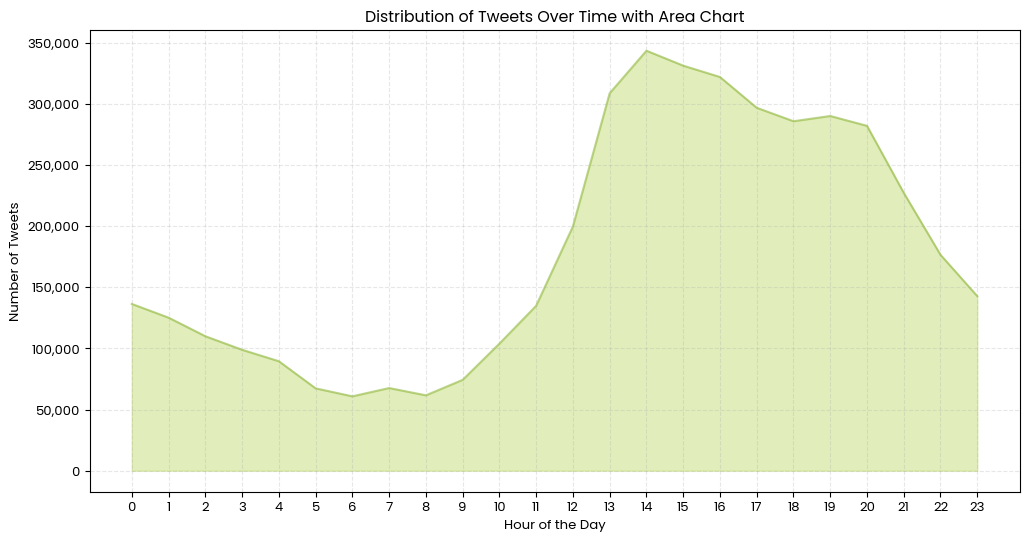

In [46]:
# Calculate tweet counts per hour
hourly_tweet_counts = tweet_company_merge['post_date'].dt.hour.value_counts(sort=False).sort_index()

# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the area chart
ax.fill_between(hourly_tweet_counts.index, hourly_tweet_counts, color="#c4dd77", alpha=0.5)

# Optionally, add a line plot on top of the area chart if needed
ax.plot(hourly_tweet_counts.index, hourly_tweet_counts, color="#93b946", alpha=0.6)
# Set grid with reduced opacity
ax.grid(True, linestyle='--', alpha=0.3)  # Reduced opacity of grid lines

# Set title and labels
ax.set_title('Distribution of Tweets Over Time with Area Chart')
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Number of Tweets')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_xticks(range(24))  # Set x-ticks to be every hour
ax.grid(True)  # Add a grid for easier reading of the plot

<font face="Poppins" size=2>The distribution shown in the chart appears to be multimodal, as there are several distinct peaks visible throughout the day.<font>

<font face="Poppins" size=2>To determine if tweet volume impacts a company's traded volume, pandas' shift operator was used to shift time series data back by one period. This enables comparison of the previous day's tweet volume with the following day's company share price.<font>

<font face="Poppins" size=2>The Spearman correlation test, preferred over Pearson correlation due to its non-reliance on normal data distribution, was employed.<font>

<font face="Poppins" size=2>Hypotheses:<font>

<font face="Poppins" size=2>Null: No correlation between tweet volume and stock trading volume.
Alternate: Correlation exists between tweet volume and stock trading volume.
A Spearman correlation p-value below 0.05 will lead to rejecting the null hypothesis, indicating a significant correlation between stock trading volume and tweet volume.<font>

<font face="Poppins" size=2>Additionally, trading volume and tweet volume were plotted on the same graph for a visual data overview. A rolling average with a 30-day window was applied to clarify the trend correlation.<font>

<font face="Poppins" size=2>Tweet Volume: This is a measure of the number of tweets per day. In the function, it's calculated by grouping the tweets_df DataFrame by the 'date' column and using the .size() method to count the number of tweets for each date. This data is then shifted by one day (using .shift(-1)) to align with the stock data for the purpose of correlation analysis.<font>

<font face="Poppins" size=2>Stock Trade Volume: This refers to the number of shares traded in a given stock over a specific time period, typically daily. It's extracted from the stocks_df DataFrame from the 'Volume' column.<font>

<font face="Poppins" size=2>Rolling Mean Calculation: Both tweet volume and stock trade volume are smoothed over a 30-day period using a rolling mean. This helps in identifying trends over time by averaging out short-term fluctuations.<font>

<font face="Poppins" size=2>Spearman Correlation: The function computes the Spearman correlation coefficient between the tweet volume and stock trade volume. This coefficient measures the strength and direction of association between two ranked variables. It's a non-parametric measure, meaning it doesn't assume a normal distribution of the data.<font>

<font face="Poppins" size=2>Plotting: The function plots both the tweet volume and stock trade volume over time on a graph. The tweet volume is displayed on one axis and the stock trade volume on another, making it easy to visually compare the two time series.<font>

<font face="Poppins" size=2>Correlation in Plot Title: The title of the plot includes the Spearman correlation value and its p-value. The correlation value (ranging from -1 to 1) indicates the strength and direction of the relationship, while the p-value indicates the statistical significance of the correlation.<font>

In [47]:
def analyze_tweet_stock_correlation(tweets_df, stocks_df, title):
    """
    Analyze the correlation between tweet volume and stock trade volume over time.

    Parameters:
    tweets_df (DataFrame): A DataFrame containing tweet data with a 'date' index.
    stocks_df (DataFrame): A DataFrame containing stock data with a 'Volume' column.
    title (str): The title for the plot.

    This function calculates the rolling mean of tweet volume and stock trade volume over 30 days,
    computes their Spearman correlation, and plots both time series along with the correlation value.

    Args:
        tweets_df (DataFrame): DataFrame with tweet data.
        stocks_df (DataFrame): DataFrame with stock data.
        title (str): Title for the plot.

    Returns:
        None
    """

    # Calculate tweet volume shifted by 1 day
    tweet_vol_shifted = tweets_df.groupby('date').size().shift(-1).dropna()

    # Extract stock trade volume data and remove NaN values
    stock_data = stocks_df['Volume'].dropna()

    # Calculate Spearman correlation between tweet volume and stock trade volume
    corr, pval = stats.spearmanr(tweet_vol_shifted.reindex(stock_data.index), stock_data, nan_policy='omit')

    # Calculate rolling mean of tweet volume and stock trade volume over 30 days
    tweets_vol = tweets_df.groupby('date').size().rolling(window=30).mean().dropna()
    stocks_data = stocks_df['Volume'].rolling(window=30).mean().dropna()

    # Create a new figure for the plot
    fig, ax1 = plt.subplots(figsize=(16, 8))
    ax2 = ax1.twinx()

    # Plot tweet volume and stock trade volume on separate axes
    ax1.plot(tweets_vol.index, tweets_vol, label='Tweet Volume')
    ax2.plot(stocks_data.index, stocks_data, color='orange', label='Trade Volume')

    # Set the title for the plot with correlation information
    ax1.set_title(title + f"\nSpearman correlation: corr={corr:.5f} pval={pval:.5f}")

    # Combine legends from both axes
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc=0)

    # Display the plot
    plt.show()

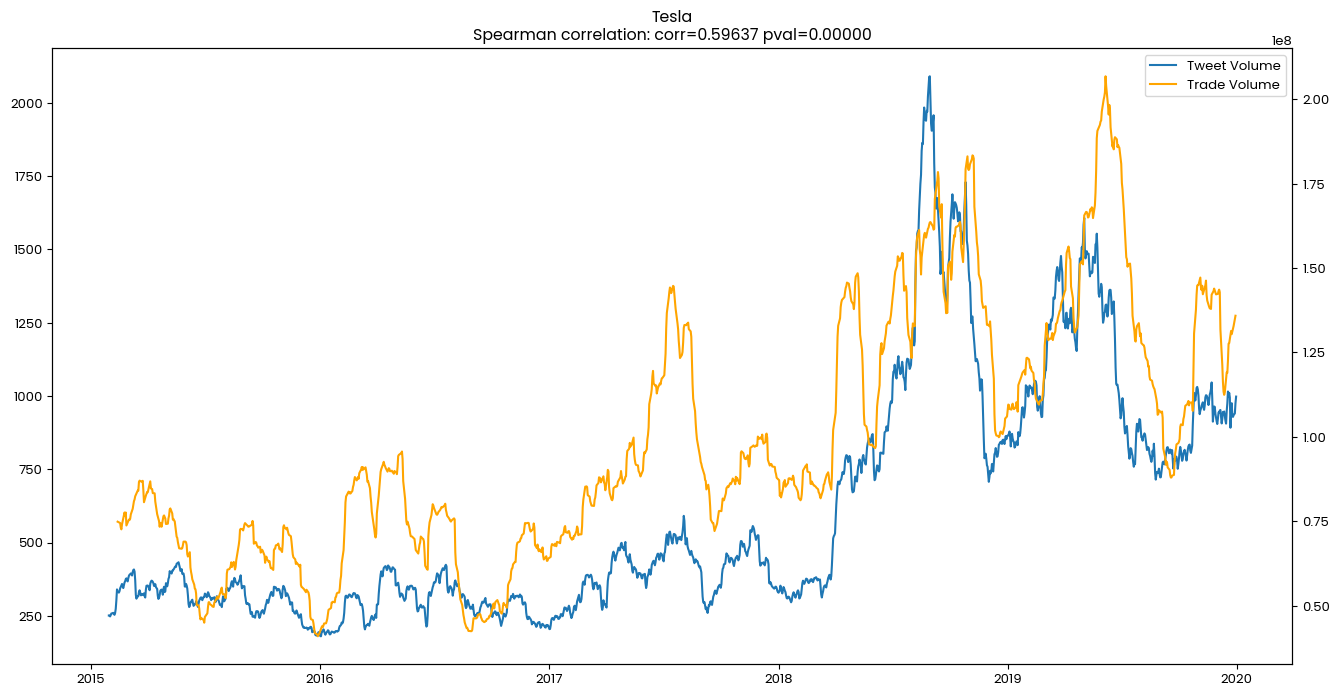

In [48]:
analyze_tweet_stock_correlation(tsla_tweet_df ,tsla_stock,"Tesla")

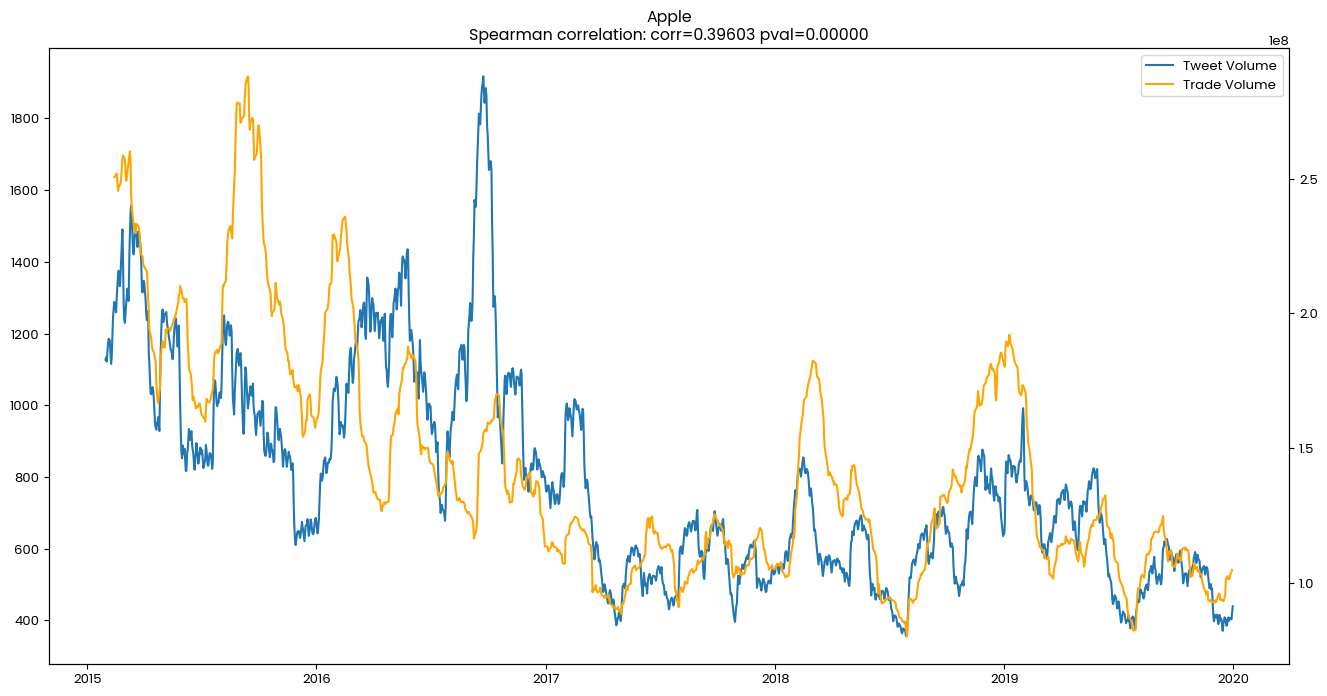

In [49]:
analyze_tweet_stock_correlation(aapl_tweet_df, aapl_stock, "Apple")

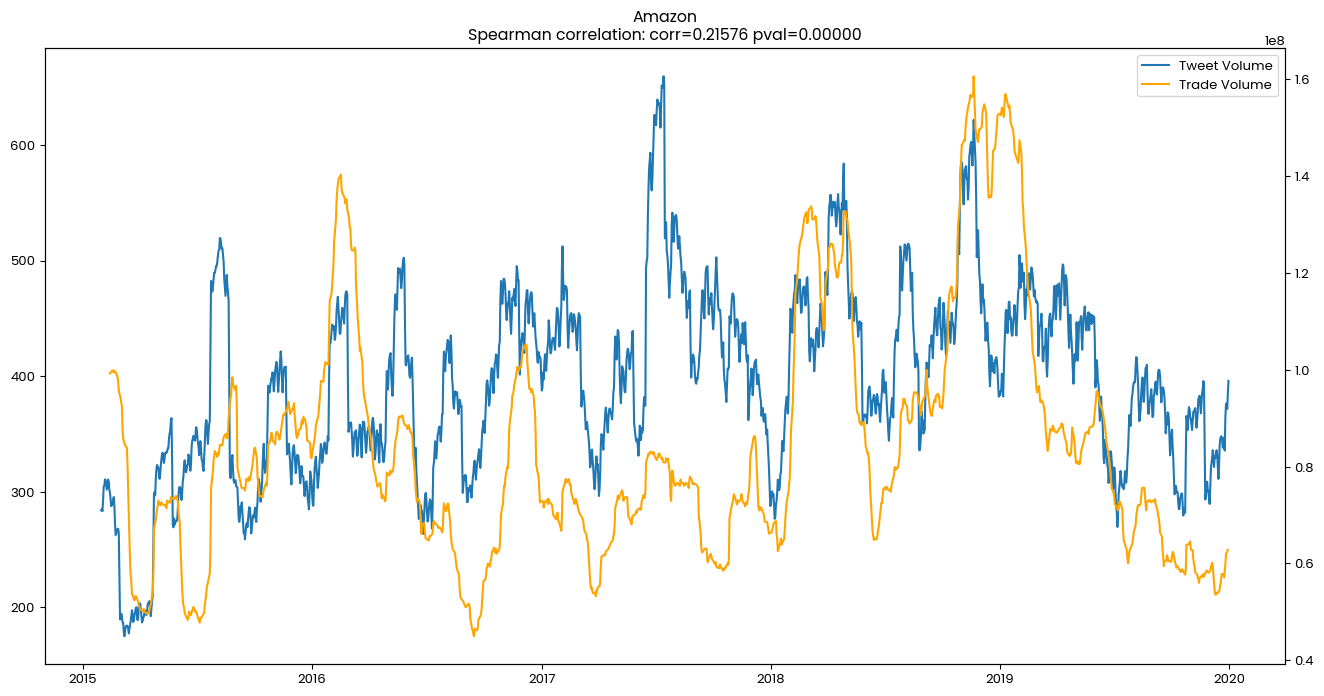

In [50]:
analyze_tweet_stock_correlation(amzn_tweet_df, amzn_stock, "Amazon")

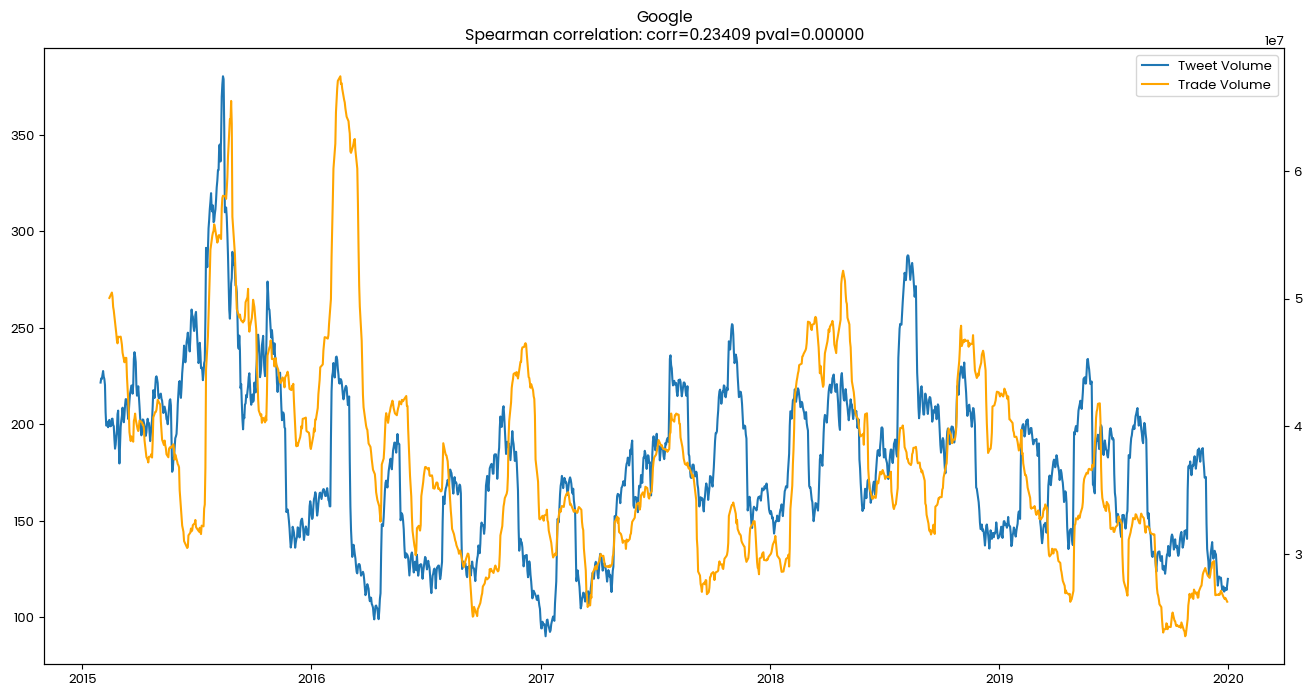

In [51]:
analyze_tweet_stock_correlation(googl_tweet_df, googl_stock, "Google")

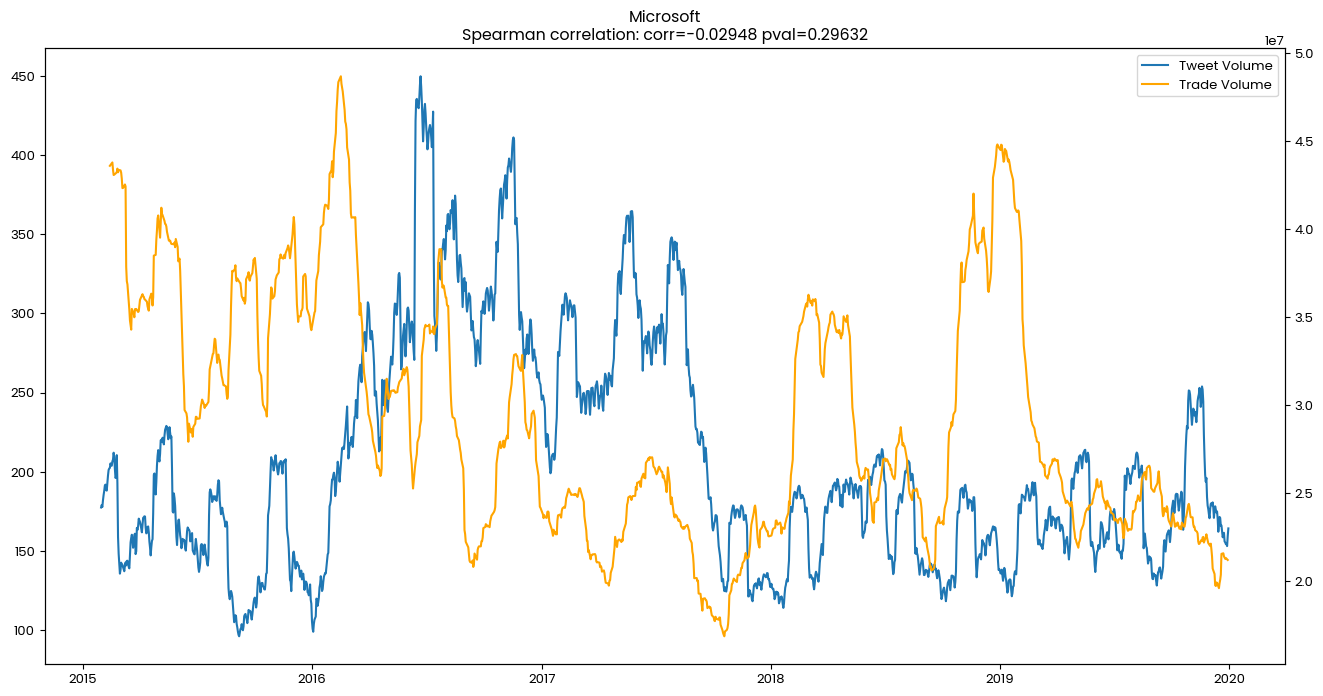

In [52]:
analyze_tweet_stock_correlation(msft_tweet_df, msft_stock, "Microsoft")

<font face="Poppins" size=2>Upon examination, it appears based on the charts that there is a positive correlation between the sheer volume of tweets and the trade volume destpte having considerable noise (NAN) values in the stock rolling mean. which ws deliberately not deleted. Nonetheless, the robustness of this correlation is highly debatable. Furthermore, it's not definitively established that the volume of tweets consistently correlates with the share price. This is exemplified in Microsoft's case, where the p-value surpassed the pre-established threshold of 0.05, casting doubt on the statistical significance of the correlation.<font>

<font face="Poppins" size=2> The next hypothesis  to examine, utilizing the pretrained FinBERT model for sentiment analysis, is structured as follows:<font>

<font face="Poppins" size=2>Null Hypothesis: There is no correlation between the sentiment expressed in tweets, as analyzed by the FinBERT model, and the share price of the company.<font>

<font face="Poppins" size=2>Alternate Hypothesis: There exists a correlation between the sentiment in tweets, as determined by the FinBERT model, and the company's share price.<font>

In [53]:
file_path = '/content/drive/MyDrive/MyModelAjibolaProject/Best Model.txt'

# Read the file and extract the best model number
with open(file_path, 'r') as file:
    content = file.readline()
    best_epoch = int(content)

# Print the extracted value
print("Best Model Number:", best_epoch)

3# Load the configuration and create the model
best_model_no = best_epoch - 1




# Define the source and destination paths
src_path = f"/content/drive/MyDrive/MyModelAjibolaProject/model_clean_label_appended_epoch_{best_model_no}"
dst_path = f"/content/model_clean_label_appended_epoch_{best_model_no}"

# Copy the directory
copy_folder(src_path, dst_path)

Best Model Number: 3


'Folder successfully copied from /content/drive/MyDrive/MyModelAjibolaProject/model_clean_label_appended_epoch_2 to /content/model_clean_label_appended_epoch_2.'

In [54]:
# Check if GPU is available and use it; otherwise, use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [55]:
model_name = "yiyanghkust/finbert-tone"
tokenizer = AutoTokenizer.from_pretrained(model_name)

model_directory = f'/content/model_clean_label_appended_epoch_{best_model_no}'

print(model_directory)
try:
    model = AutoModelForSequenceClassification.from_pretrained(model_directory, local_files_only=True)
    print("File is loadable - likely intact.")
except Exception as e:
    print("Error loading file:", e)

/content/model_clean_label_appended_epoch_2
File is loadable - likely intact.


In [56]:
model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30873, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [69]:
model.to(device)

# def preprocess(tweet):
#     inputs = tokenizer.encode_plus(tweet, add_special_tokens=True, max_length=512, padding='max_length', truncation=True, return_tensors="pt")
#     return inputs

def preprocess(tweets):
    # Ensure the input is a list of strings
    if isinstance(tweets, str):
        tweets = [tweets]
    elif not isinstance(tweets, list):
        raise ValueError("Input must be a list of strings")

    # Debugging: print the type and a sample of the input
    # print(f"Input type: {type(tweets)}, Input sample: {tweets[:2]}")

    inputs = tokenizer.batch_encode_plus(
        tweets, add_special_tokens=True, max_length=512,
        padding='max_length', truncation=True, return_tensors="pt"
    )
    return inputs

def predict_sentiment(tweets):
    inputs = preprocess(tweets)
    inputs = {key: val.to(device) for key, val in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)
        predictions = torch.argmax(outputs.logits, dim=1)

    return predictions.cpu().numpy()

In [70]:
def batch_predict_sentiment(df, batch_size=100):
    def process_batch(batch):
        return predict_sentiment(batch['body'].tolist())

    # Calculate the number of batches
    num_batches = np.ceil(len(df) / batch_size).astype(int)

    # Initialize an empty list to store results
    results = []

    # Process each batch and show progress
    for i in tqdm(range(num_batches), desc="Processing Batches"):
        batch_start = i * batch_size
        batch_end = (i + 1) * batch_size
        batch = df.iloc[batch_start:batch_end]
        batch_results = process_batch(batch)

        # Ensure that each prediction is appended individually
        results.extend(batch_results.tolist())

    # Assign the results back to the DataFrame
    df['finbert_trained_data_scores'] = results
    return df

In [99]:
# Use the function on your DataFrame
tsla_tweet_df = batch_predict_sentiment(tsla_tweet_df)

Processing Batches: 100%|██████████| 10969/10969 [10:06:44<00:00,  3.32s/it]
<ipython-input-98-25dc143f5f2f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['finbert_trained_data_scores'] = results


In [1]:
tsla_tweet_df

NameError: ignored

In [101]:
tsla_tweet_df.to_csv('/content/tweet_about_the_top_companies_tsla.csv', index=False)
tsla_tweet_df.to_csv('/content/drive/MyDrive/MyModelAjibolaProject/tweet_about_the_top_companies_tsla.csv', index=False)

<font face="Poppins" size=2>Load the save file from google drive in case of runtime isses in colab.<font>

In [59]:
shutil.copy("/content/drive/MyDrive/MyModelAjibolaProject/tweet_about_the_top_companies_tsla.csv", "/content/tweet_about_the_top_companies_tsla.csv")

'/content/tweet_about_the_top_companies_tsla.csv'

In [60]:
tsla_tweet_df = pd.read_csv('/content/tweet_about_the_top_companies_tsla.csv')

In [61]:
tsla_tweet_df

,writer,post_date,comment_num,retweet_num,like_num,ticker_symbol,body,date,finbert_trained_data_scores
0,ShowDreamCar,2015-01-01 00:06:47,0,0,1,TSLA,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,2015-01-01,0
1,i_Know_First,2015-01-01 00:10:05,0,0,1,TSLA,Swing Trading: Up To 8.91% Return In 14 Days ...,2015-01-01,2
2,aaplstocknews,2015-01-01 00:10:05,0,0,1,TSLA,Swing Trading: Up To 8.91% Return In 14 Days ...,2015-01-01,2
3,iknowfirst,2015-01-01 00:10:05,0,0,1,TSLA,Swing Trading: Up To 8.91% Return In 14 Days ...,2015-01-01,2
4,Cprediction,2015-01-01 00:10:16,0,0,1,TSLA,Swing Trading: Up To 8.91% Return In 14 Days ...,2015-01-01,2
...,...,...,...,...,...,...,...,...,...
1096863,StockJoke,2019-12-31 23:49:06,0,0,0,TSLA,"Im getting wasted on NYE, and thanks to @NHTSA...",2019-12-31,2
1096864,sweetog76,2019-12-31 23:50:24,0,0,0,TSLA,$TSLA Very Interesting dude:,2019-12-31,2
1096865,MelaynaLokosky,2019-12-31 23:50:45,0,1,0,TSLA,If only 2020 brought more self awareness to Te...,2019-12-31,1
1096866,ShortingIsFun,2019-12-31 23:53:21,0,0,1,TSLA,In 2020 I may start Tweeting out positive news...,2019-12-31,2


In [74]:
def plot_stock_sentiment_correlation(tweets, stock, title):
    """
    Plots the correlation between tweet sentiment and stock price.

    Parameters:
    tweets (DataFrame): DataFrame containing tweet dates and sentiment scores.
    stock (DataFrame): DataFrame containing stock prices with dates as the index.
    title (str): Title for the plot.

    Returns:
    None: The function plots a graph and does not return any value.
    """
    # Ensure that the 'date' column in the tweets DataFrame is in datetime format
    tweets['date'] = pd.to_datetime(tweets['date'])

    # Calculate the mean sentiment score of tweets for each date, shifted by one day
    mean_sentiment = tweets.groupby('date')['finbert_trained_data_scores'].mean().shift(-1)

    # Apply a 30-day rolling mean to smooth the sentiment data, and drop NA values for plotting
    visual = mean_sentiment.rolling(30).mean().dropna()

    # Prepare the data for correlation test, dropping NA values
    corr_test = mean_sentiment.dropna()

    # Calculate the Spearman correlation between tweet sentiment and stock opening price
    corr, pval = stat.spearmanr(corr_test.reindex(stock.index), stock['Open'], nan_policy='omit')

    # Set up the plot with a primary and secondary y-axis
    fig, ax1 = plt.subplots(figsize=(16, 8))
    ax2 = ax1.twinx()

    # Plot the sentiment data on the primary y-axis
    ax1.plot(visual.index, visual, label='Tweet Sentiment')

    # Plot the stock 'Close' price data on the secondary y-axis
    ax2.plot(stock.index, stock['Close'], color='orange', label='Share Price')

    # Set the title of the plot with the calculated Spearman correlation
    ax1.set_title(f"Effects of {title} Tweets on Share Price\nSpearman Correlation: corr={corr:.5f} pval={pval:.5f}")

    # Combine the legend entries from both y-axes and display them together
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc=0)

    # Display the plot
    plt.show()

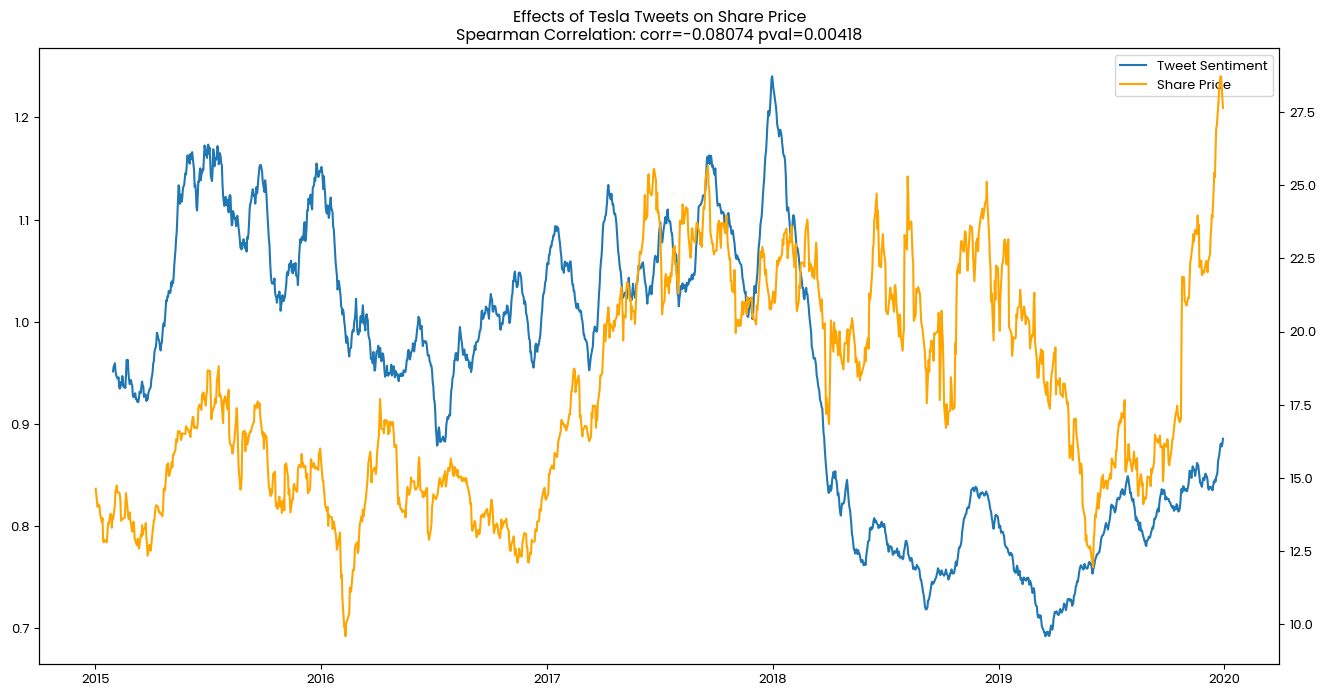

In [75]:
plot_stock_sentiment_correlation(tsla_tweet_df ,tsla_stock,"Tesla")

In [76]:
 # Filter the DataFrame for the date range 2017-2018 for tesla stock
filtered_by_year_2017_2018_tsla_tweet_df   = tsla_tweet_df[(tsla_tweet_df['post_date'] >= '2017-03-01') & (tsla_tweet_df['post_date'] <= '2018-04-30')]

In [77]:
# Convert the index to a DatetimeIndex
tsla_stock.index = pd.to_datetime(tsla_stock.index)
# Filter the DataFrame for the date range 2017-2018 for tesla stock
filtered_by_year_2017_2018_tsla_stock_df  = tsla_stock.loc['2017-03-01':'2018-04-30']

<ipython-input-74-a4bd19db6c29>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['date'] = pd.to_datetime(tweets['date'])


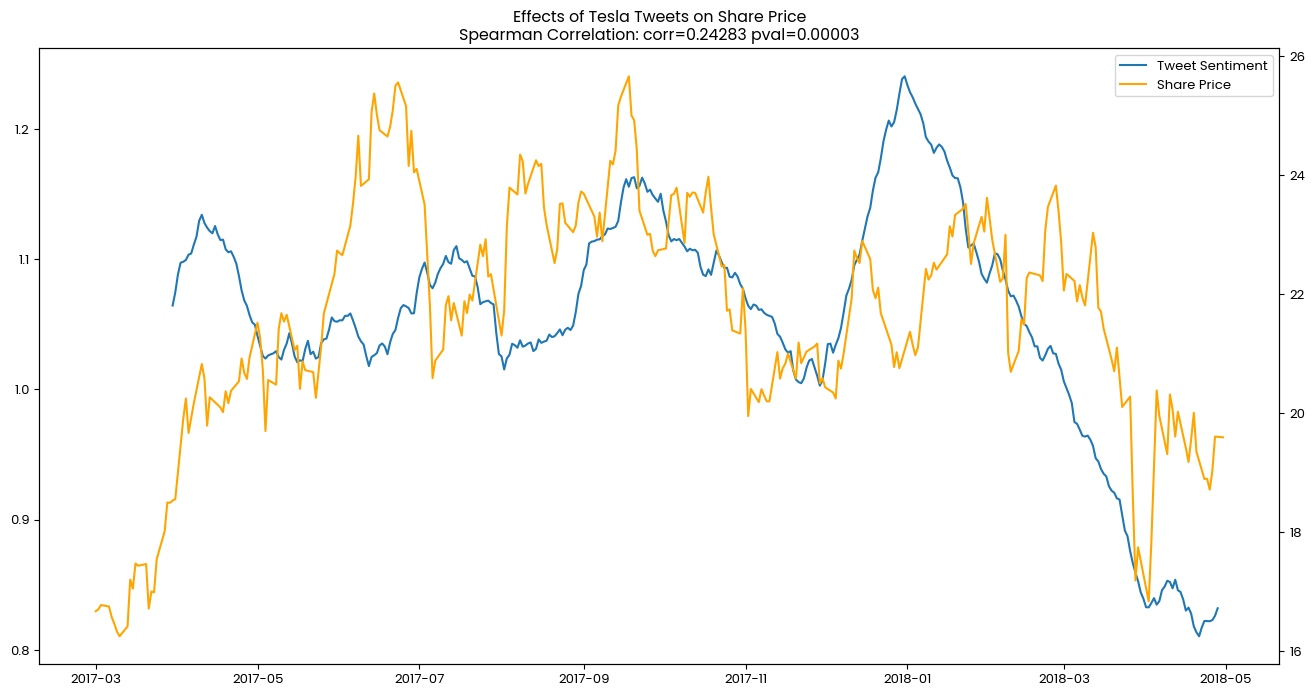

In [78]:
plot_stock_sentiment_correlation(filtered_by_year_2017_2018_tsla_tweet_df , filtered_by_year_2017_2018_tsla_stock_df,"Tesla")

In [71]:
# Predict sentiment for each amazon tweet
amzn_tweet_df = batch_predict_sentiment(amzn_tweet_df)
amzn_tweet_df.to_csv('/content/tweet_about_the_top_companies_amzn.csv', index=False)
amzn_tweet_df.to_csv('/content/drive/MyDrive/MyModelAjibolaProject/tweet_about_the_top_companies_amzn.csv', index=False)

Processing Batches: 100%|██████████| 7188/7188 [6:31:48<00:00,  3.27s/it]
<ipython-input-70-25dc143f5f2f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['finbert_trained_data_scores'] = results


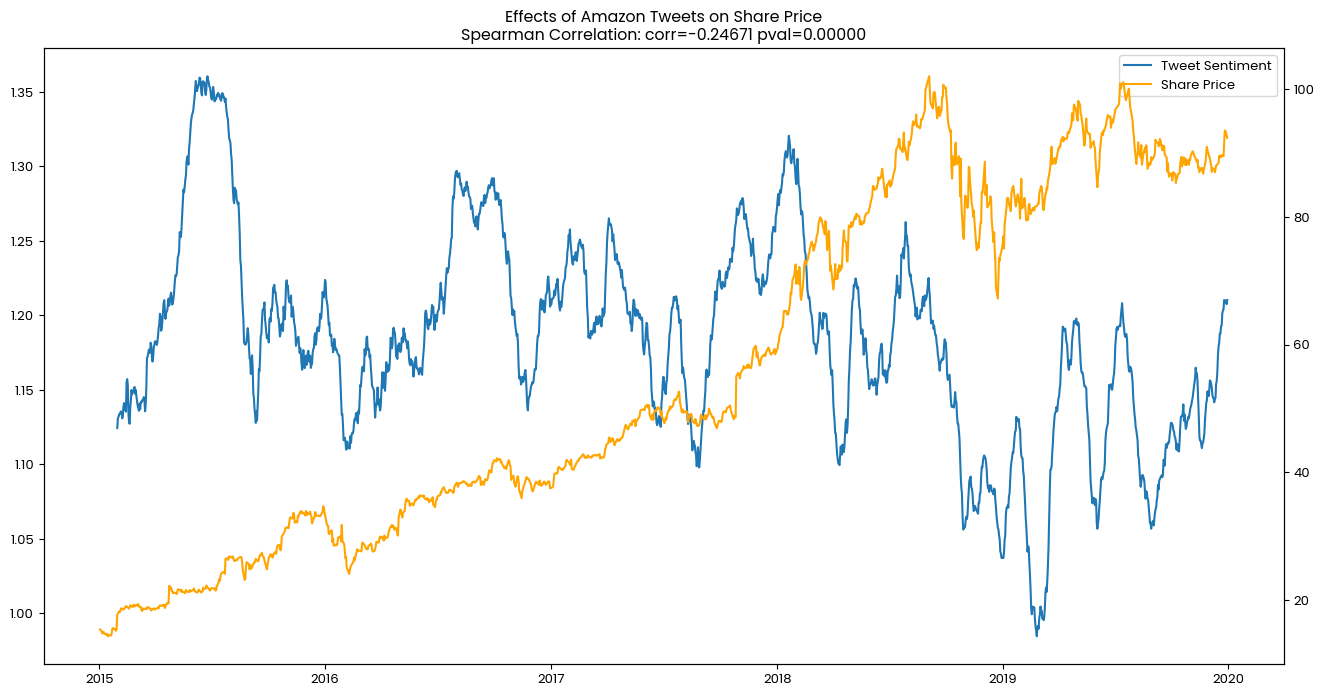

In [93]:
plot_stock_sentiment_correlation(amzn_tweet_df , amzn_stock, "Amazon")

In [104]:
# Predict sentiment for each amazon tweet
msft_tweet_df = batch_predict_sentiment(msft_tweet_df)
msft_tweet_df.to_csv('/content/tweet_about_the_top_companies_msft.csv', index=False)
msft_tweet_df.to_csv('/content/drive/MyDrive/MyModelAjibolaProject/tweet_about_the_top_companies_msft.csv', index=False)

Processing Batches: 100%|██████████| 3758/3758 [3:24:45<00:00,  3.27s/it]
<ipython-input-70-25dc143f5f2f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['finbert_trained_data_scores'] = results


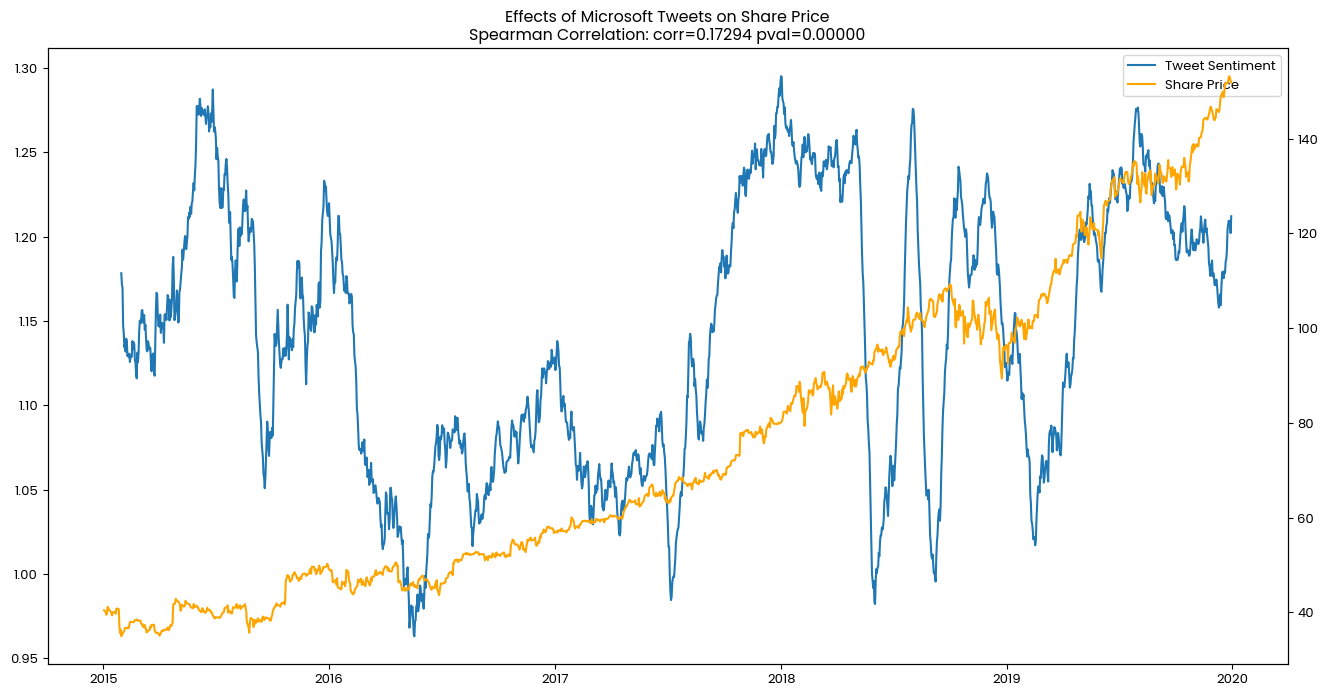

In [136]:
# Predict sentiment for each microsoft tweet
plot_stock_sentiment_correlation(msft_tweet_df , msft_stock, "Microsoft")

In [133]:
 # Filter the DataFrame for the date range March 2019- July 2019 from microsoft stock
filtered_by_year_2019_2019_msft_tweet_df   =  msft_tweet_df[(msft_tweet_df['post_date'] >= '2019-03-01') & (msft_tweet_df['post_date'] <= '2019-07-31')]

In [127]:
msft_stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02,40.366233,41.023719,40.262421,40.452744,27913900,0.0,0.0
2015-01-05,40.115340,40.426782,40.011527,40.080738,39673900,0.0,0.0
2015-01-06,40.123995,40.444086,39.397299,39.492462,36447900,0.0,0.0
2015-01-07,39.777950,40.193204,39.354046,39.994228,29114100,0.0,0.0
2015-01-08,40.444073,41.309187,40.418121,41.170769,29645200,0.0,0.0
...,...,...,...,...,...,...,...
2019-12-23,152.370439,152.370439,151.551355,151.686264,17718200,0.0,0.0
2019-12-24,151.753688,151.975336,151.406778,151.657333,8989200,0.0,0.0
2019-12-26,151.830767,152.958222,151.676582,152.900406,14520600,0.0,0.0


In [134]:
# Filter the DataFrame for the date range from March 2019 to June 2019 for microsoft stock
# Convert the index to a DatetimeIndex
msft_stock.index = pd.to_datetime(msft_stock.index)

# Now filter the DataFrame for the desired date range
filtered_by_year_2019_2019_msft_stock_df = msft_stock.loc['2019-03-01':'2019-07-31']

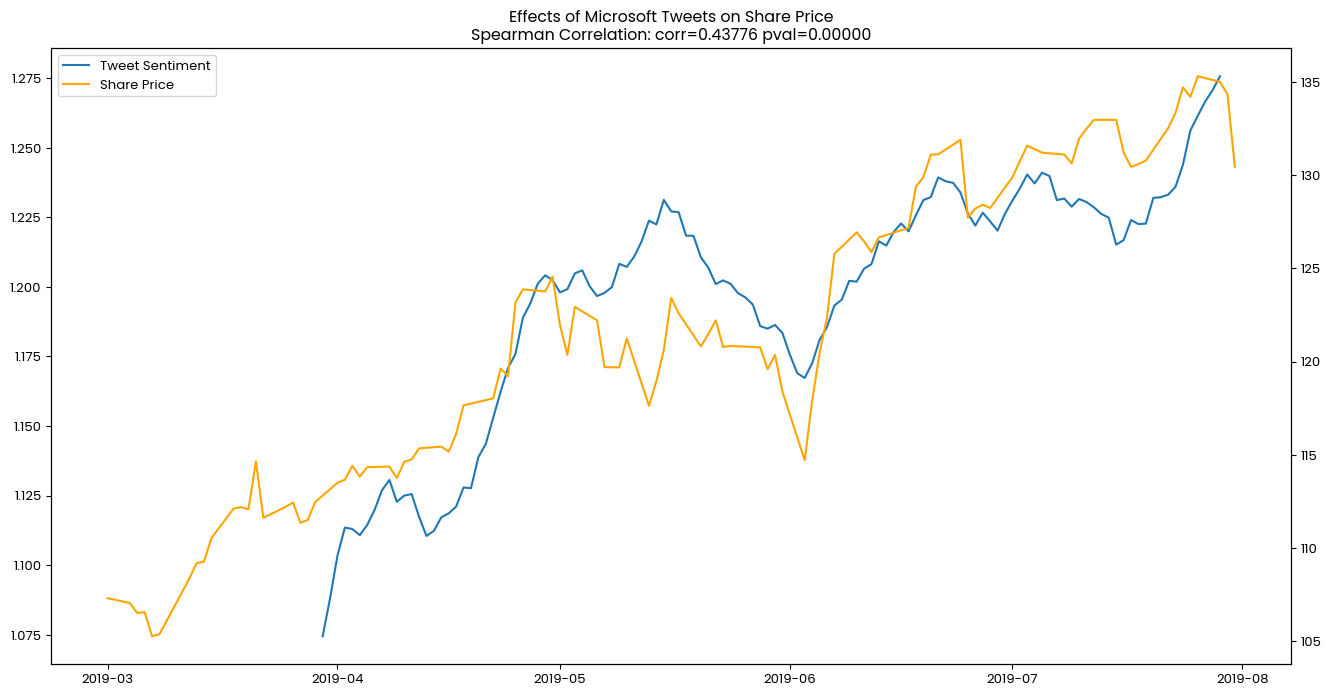

In [135]:
# Predict sentiment for each microsoft tweet from January 2019 to June 2019
plot_stock_sentiment_correlation(filtered_by_year_2019_2019_msft_tweet_df  , filtered_by_year_2019_2019_msft_stock_df, "Microsoft")